## The following code is to generate alluvial plot in https://rawgraphs.io/

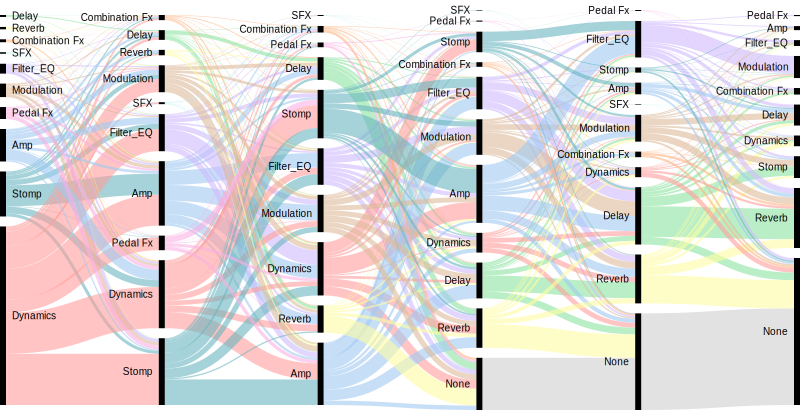

In [1]:
from IPython.core.display import SVG
SVG(filename='output/alluvial-categories-original.svg')

In [2]:
import pandas as pd
from experiments.data.load_data_util import load_data, load_data_categories

data = load_data('../data')
plugins_categories = load_data_categories('../data')

def generate_categories_with_index(plugins_categories):
    categories_with_index = pd.DataFrame(plugins_categories['category'].unique(), columns=['name']).reset_index()
    categories_with_index
    categories_with_index.index = categories_with_index['name']
    categories_with_index
    del categories_with_index['name']
    return categories_with_index


def generate_plugins_categories_index(plugins_categories, remove_list=None):
    plugins_categories_index = plugins_categories.join(generate_categories_with_index(plugins_categories), on='category')
    plugins_categories_index
    
    for item in remove_list:
        del plugins_categories_index[item]

    return plugins_categories_index

plugins_categories_index = generate_plugins_categories_index(plugins_categories, remove_list=['name', 'category'])

for column in data.columns.copy():
    data = data.join(plugins_categories_index, on=column)
    del data[column]
    data = data.rename(columns={'index': column})

data.head()

plugin1  plugin2  plugin3  plugin4  plugin5  plugin6
id   name                                                            
5299 plexi*dly*        2        3        6       10       10       10
5300 HB*Boston3        1        3        1       10       10       10
5301 _Clean****        0        1        0       10       10       10
5303 _2tone****        2        6        3       10       10       10
5304 Numb______        2        6        3       10       10       10

In [3]:
data.drop_duplicates().to_csv('../data/patches-categories.csv')
print(data.drop_duplicates().shape[0])
data.drop_duplicates().head()

1286


plugin1  plugin2  plugin3  plugin4  plugin5  plugin6
id   name                                                            
5299 plexi*dly*        2        3        6       10       10       10
5300 HB*Boston3        1        3        1       10       10       10
5301 _Clean****        0        1        0       10       10       10
5303 _2tone****        2        6        3       10       10       10
5307 _Ethereal         1        3        6       10       10       10

In [4]:
data = load_data('../data')

plugins_categories_index = generate_plugins_categories_index(plugins_categories, remove_list=['name'])

for column in data.columns.copy():
    data = data.join(plugins_categories_index, on=column)
    del data[column]
    del data['index']
    data = data.rename(columns={'index': column, 'category': f'{column}'})

data.head()

plugin1    plugin2    plugin3 plugin4 plugin5 plugin6
id   name                                                               
5299 plexi*dly*      Stomp        Amp      Delay    None    None    None
5300 HB*Boston3  Filter_EQ        Amp  Filter_EQ    None    None    None
5301 _Clean****   Dynamics  Filter_EQ   Dynamics    None    None    None
5303 _2tone****      Stomp      Delay        Amp    None    None    None
5304 Numb______      Stomp      Delay        Amp    None    None    None

In [5]:
data.to_csv('../data/patches-categories-full.csv')
print(data.shape[0])
data.head()

2161


plugin1    plugin2    plugin3 plugin4 plugin5 plugin6
id   name                                                               
5299 plexi*dly*      Stomp        Amp      Delay    None    None    None
5300 HB*Boston3  Filter_EQ        Amp  Filter_EQ    None    None    None
5301 _Clean****   Dynamics  Filter_EQ   Dynamics    None    None    None
5303 _2tone****      Stomp      Delay        Amp    None    None    None
5304 Numb______      Stomp      Delay        Amp    None    None    None